In [1]:
import pandas as pd

# Loading the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                                          'petal width (cm)', 'Species'])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

       Species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [2]:
# To know number of rows and collumns
df.shape

(150, 5)

In [3]:
# Check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# To find if any null value is present
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [5]:
# To see summary statistics
df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5

### other options for palettes 

- "PRGn" 
- "flare"
- "colorblind"

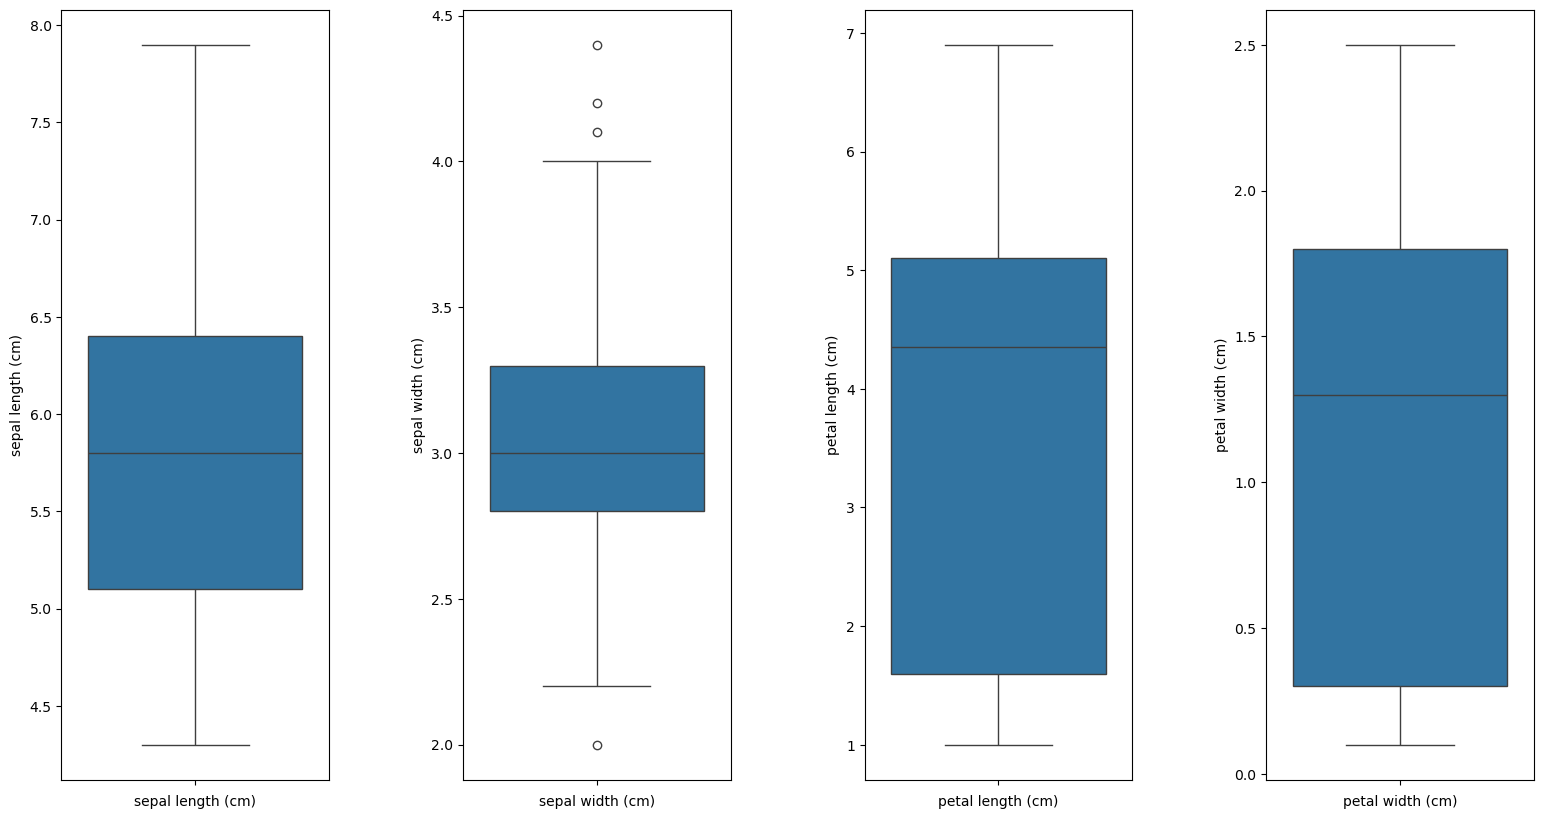

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline # inline render graphs below cell (but maybe not necessary anymore) 

columns = df.columns # my data has 4 columns.

fig, ax = plt.subplots(ncols = 4, figsize=(19,10))
plt.subplots_adjust(wspace = 0.5) # wspace = width space

for i in range(0,4):
    s = sns.boxplot(ax = ax[i], data = df[columns[i]], showfliers = True)
    ax[i].set_xlabel(columns[i])

plt.show()

In [9]:
    # To remove outliers from 'sepal width (cm)'
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 5)

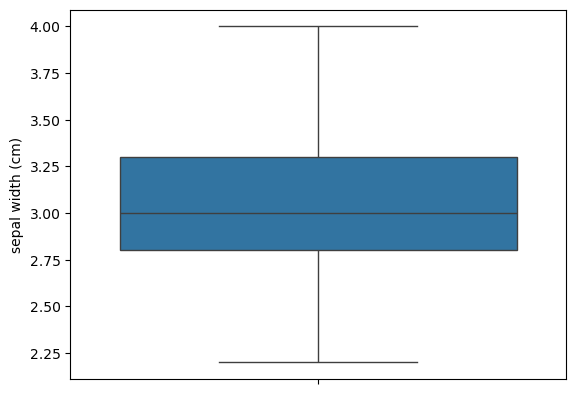

In [10]:
# Boxplot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X = df.drop("Species",axis=1)
y = df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

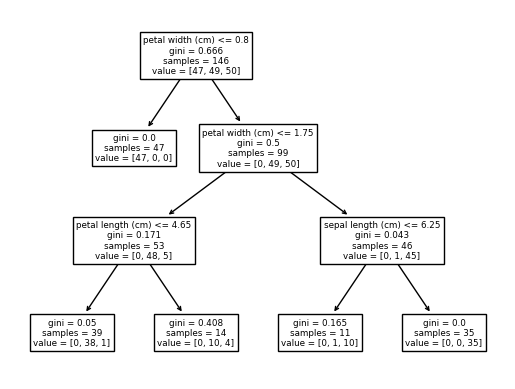

In [13]:
from sklearn import tree

#print(dt.feature_names_in_)

t = tree.plot_tree(decision_tree = dt, feature_names=dt.feature_names_in_) # returns a array with each leaf and their values

In [14]:
# Defining an object for DTC and fitting for train dataset
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [15]:
from sklearn.metrics import accuracy_score

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9545454545454546


In [16]:
from sklearn.metrics import classification_report 
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        44
      macro avg       0.96      0.96      0.95        44
   weighted avg       0.96      0.95      0.95        44



In [17]:
from sklearn.model_selection import GridSearchCV


# Hyperparameter Tuning of DTC

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [18]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

[Text(0.4, 0.875, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 102\nvalue = [32, 34, 36]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.6, 0.625, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(0.4, 0.375, 'petal length (cm) <= 4.95\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.6, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

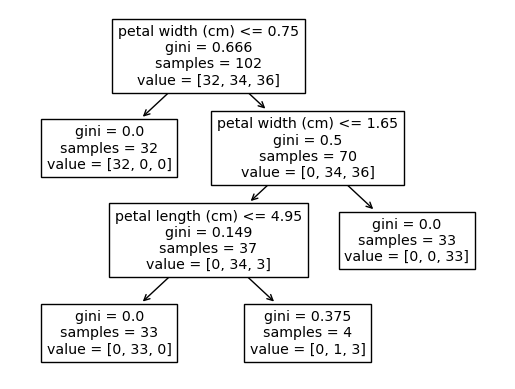

In [19]:
tree.plot_tree(decision_tree = dt, feature_names=dt.feature_names_in_)

In [20]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

In [21]:
from sklearn.metrics import confusion_matrix 

print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Train: 
 [[32  0  0]
 [ 0 33  1]
 [ 0  0 36]]

 Confusion Matrix - Test: 
 [[15  0  0]
 [ 0 13  2]
 [ 0  0 14]]


In [22]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        44
      macro avg       0.96      0.96      0.95        44
   weighted avg       0.96      0.95      0.95        44



In [23]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.9901960784313726
Accuracy of Decision Tree-Test:  0.9545454545454546
